In [14]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

112.32576854981507
[1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014] [111.0, 114.7, 116.3, 120.4, 124.9, 131.0, 141.0, 161.5, 171.8, 176.5, 181.5, 186.9, 194.2, 201.7, 209.4, 206.5, 208.7, 203.1, 203.5, 204.7, 206.0]
Predicted Data
[260.97861471861506, 266.6490043290032, 272.3193939393932, 277.98978354978317, 283.66017316017314, 289.3305627705631, 295.0009523809513, 300.67134199134125, 306.3417316017312, 312.0121212121212]
[2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029]


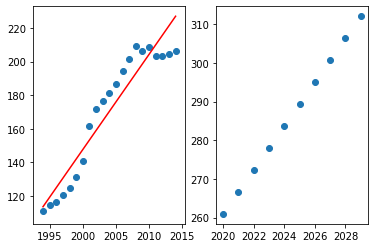

In [15]:
a=pd.read_csv("./cci.csv")
a=a.drop(columns=['2016','Month'])
x=list(a.columns)
y=list(a.iloc[12,:])


for i in range(len(y)):
    y[i] = float(y[i])
    
for i in range(len(x)):
    x[i] = int(x[i])

test_x=x.pop()
test_y=y.pop()

x_mean=np.mean(x)
y_mean=np.mean(y)
l=len(x)
numr=0
denm=0
for i in range(l):
    
    numr+=(x[i]-x_mean)*(y[i]-y_mean)
    denm+=(x[i]-x_mean)**2
grad=numr/denm
const=y_mean-(grad*x_mean) 
# print(const)

_y=[0]*len(x)

for i in range(len(x)):
    
    _y[i]=grad*x[i]+const
pred_y=pd.Series(_y)
plt.subplot(1,2,1)
plt.plot(x,pred_y,color='red')
plt.scatter(x,y)

pred_y=grad*test_x+const
print((pred_y/test_y)*100)
print(x,y)

startingYear = 2020
predictYears = []
predictCCIValues = []
for i in range(10):
    predictCCIValues.append(grad*startingYear + const)
    predictYears.append(startingYear)
    startingYear+=1
    
print("Predicted Data")
print(predictCCIValues)
print(predictYears)

plt.subplot(1,2,2)
plt.scatter(predictYears, predictCCIValues)


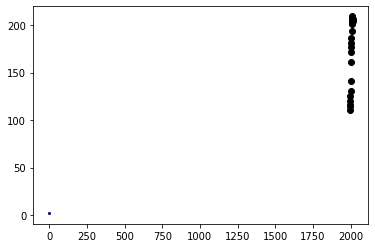

{1: [122, 1790], 2: [967, 2142], 3: [2344, 282]}

In [9]:
# k means clustering
import numpy as np

k=3

centroid={i+1:[np.random.randint(0,2449) ,np.random.randint(0,2449) ] 
            for i in range(k)}
# centroid

plt.scatter(x,y,color='k')
colormap={1:'r',2:'g',3:'b'}
for i in centroid.keys():
    plt.scatter(*centroid,color=colormap[i])

plt.show()
centroid



In [10]:

def assigment(a,centroid):
    k_x=pd.Series(x)
    k_y=pd.Series(y)
    for i in centroid.keys():
        a['distance_from{}'.format(i)]=np.sqrt((k_x-centroid[i][0])**2 + 
                                           (k_y-centroid[i][1])**2 )
        centroid_dist=['distance_from{}'.format(i) for i in centroid.keys()]
        a['closest']=a.loc[:,centroid_dist].idxmin(axis=1)
        a['closest']=a['closest'].map(lambda kx: int(kx.lstrip('distance_from')))
        a['color']=a['closest'].map(lambda kx:colormap[kx])    
    return a
k_x=pd.Series(x)
k_y=pd.Series(y)
a['average']=k_y
a['years']=k_x
assigment(a,centroid)
a


/root/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2013,2014,2015,average,years,distance_from1,closest,color,distance_from2,distance_from3
0,109.2,113.5,115.9,118,122.9,126.3,135.8,154.3,169.9,174.2,...,204.1,204.9,206.2,111.0,1994,2514.642122,3,b,2275.893231,389.539472
1,109.3,114.1,115.7,118.5,123.1,126.4,136.1,154.7,170,174.5,...,204.2,205.4,206,114.7,1995,2512.918441,3,b,2273.044058,387.027505
2,109.4,114.1,115.9,118.8,123.8,126.5,136.4,155.6,169.5,174.5,...,204.3,205.4,206.5,116.3,1996,2512.597797,3,b,2272.069869,385.435455
3,110.3,114.1,115.9,119.8,123.8,130.5,136.5,157.4,169.5,177.3,...,204.5,205.6,206.8,120.4,1997,2510.615295,3,b,2268.869005,382.783960
4,110.1,114.1,115.9,119.8,124.5,130.5,136.8,157.6,169.5,177.3,...,204.5,205.9,207.2,124.9,1998,2508.372781,3,b,2265.315300,379.995276
5,110.6,114.1,116,119.9,124.5,130.5,136.9,157.7,169.7,177.4,...,204.8,206,207.6,131.0,1999,2505.076845,3,b,2260.341788,376.597929
6,110.7,114.5,116,120.8,125.7,131.5,137.2,161.1,173.8,177.1,...,204.8,206,207.4,141.0,2000,2499.216877,3,b,2251.908080,371.775470
7,110.9,114.5,116,121,125.7,131.5,137.2,165.9,173.9,177.2,...,205,206.6,207.4,161.5,2001,2486.494169,3,b,2234.174624,363.550891
8,112.2,115.7,116.9,121.5,126,134.1,137.7,166,173.9,177.2,...,205.1,206.4,207.3,171.8,2002,2480.518341,3,b,2225.514107,359.316073
9,112.7,115.8,117.1,122,126.2,134.7,153.8,169.3,173.9,177.2,...,205.4,206.7,207.2,176.5,2003,2478.213722,3,b,2221.820481,356.947125


In [11]:
# logistic regression
from sklearn.model_selection import train_test_split
log_x=a.drop(columns=['color','closest','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007', '2008','2009','2010','2011','2012','2013','2014','2015'])
log_y=a['closest']

x_train,x_test,y_train,Y_test=train_test_split(log_x,log_y,test_size=0.3,random_state=1)

from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
log_x

/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 3

In [22]:
predictions=logmodel.predict(x_test)

In [23]:
from sklearn.metrics import classification_report

In [25]:
classification_report(Y_test,predictions)

'              precision    recall  f1-score   support\n\n           2       0.30      1.00      0.46       197\n           3       1.00      0.13      0.22       538\n\n    accuracy                           0.36       735\n   macro avg       0.65      0.56      0.34       735\nweighted avg       0.81      0.36      0.29       735\n'

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(Y_test,predictions)

array([[197,   0],
       [470,  68]])

In [28]:
from sklearn.metrics import  accuracy_score

In [114]:
accuracy_score(Y_test,predictions)

NameError: name 'accuracy_score' is not defined